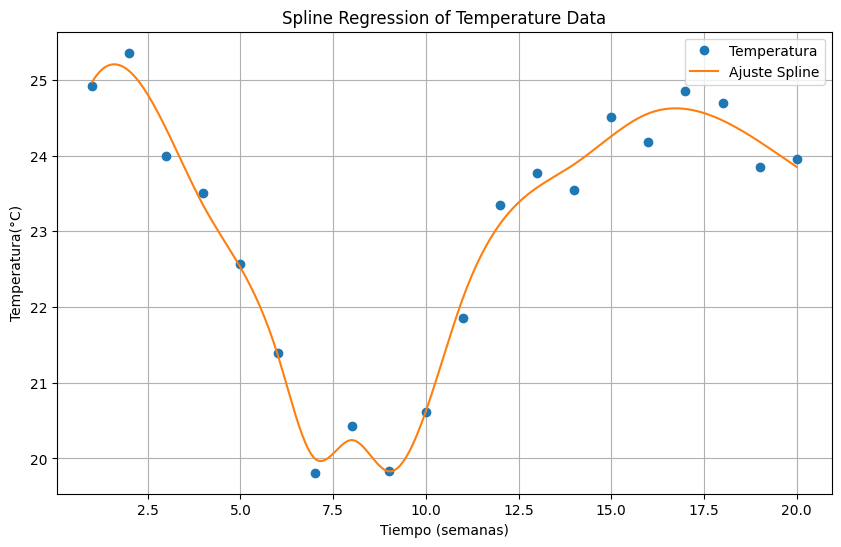

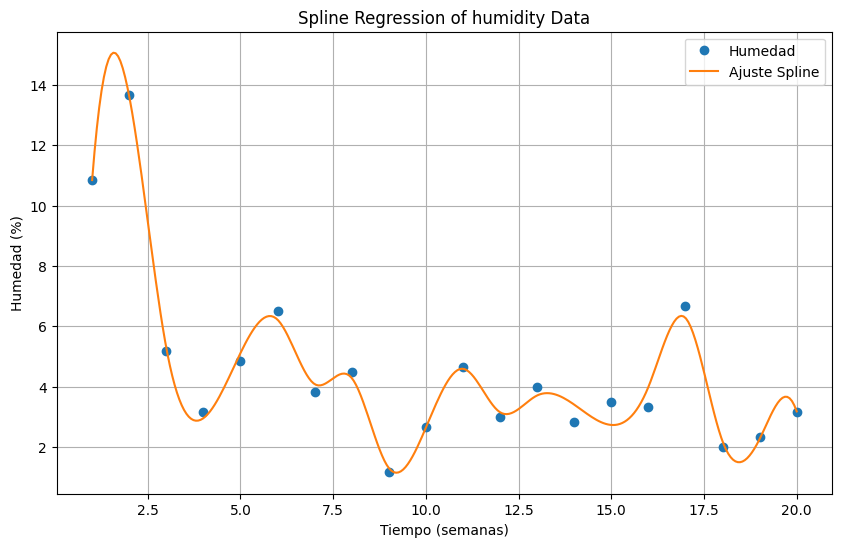

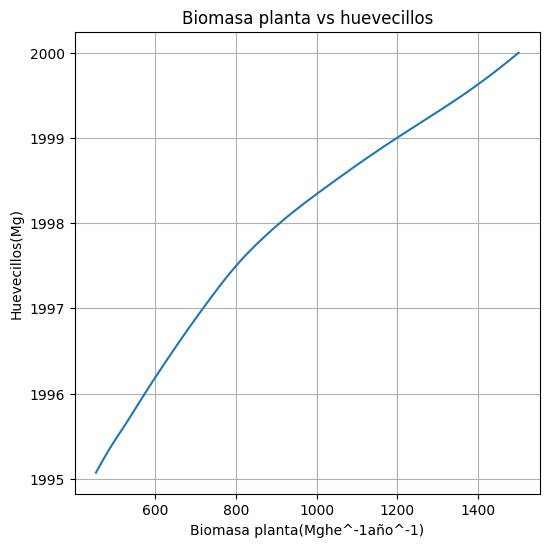

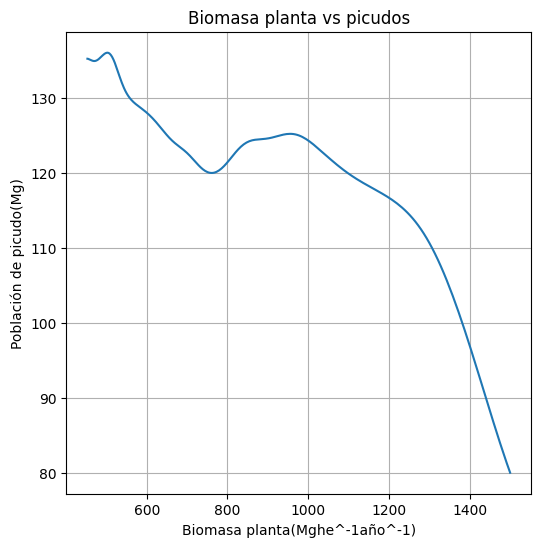

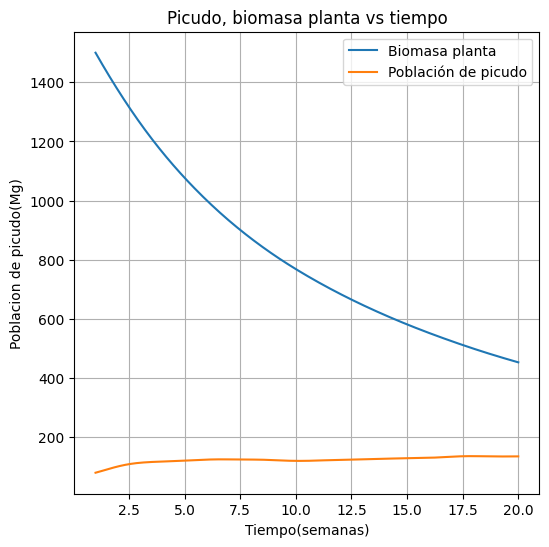

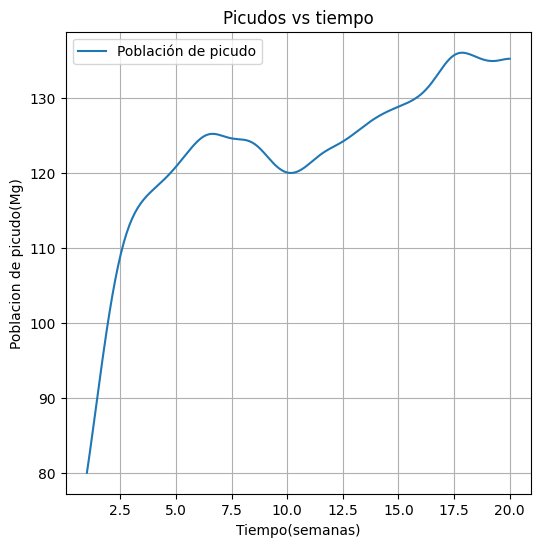

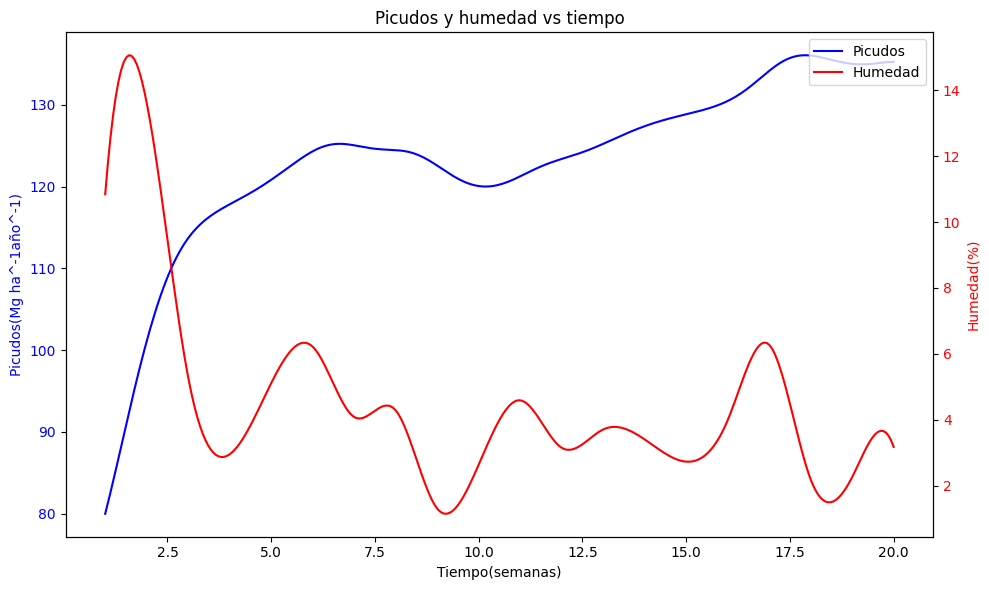

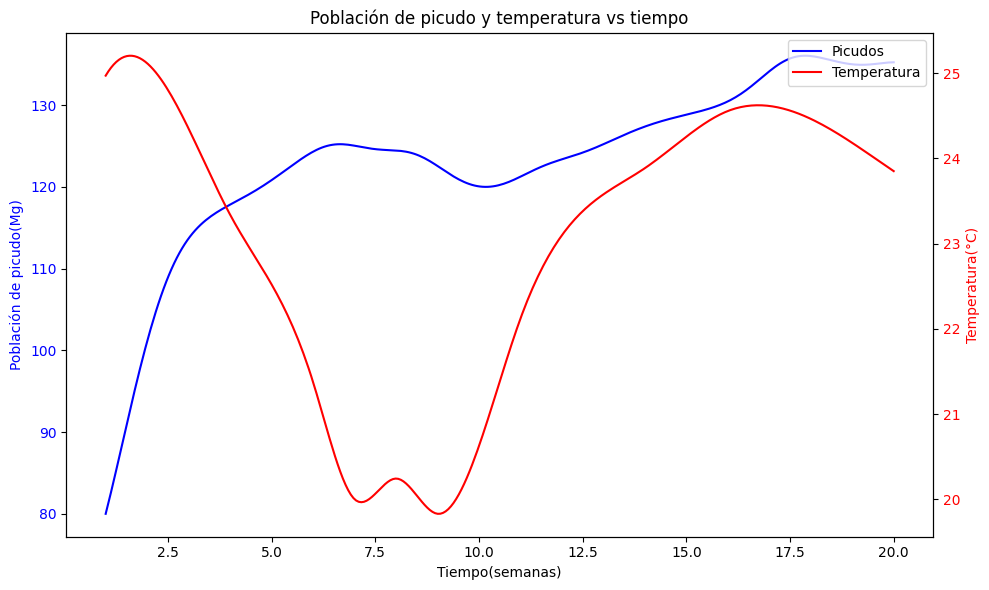

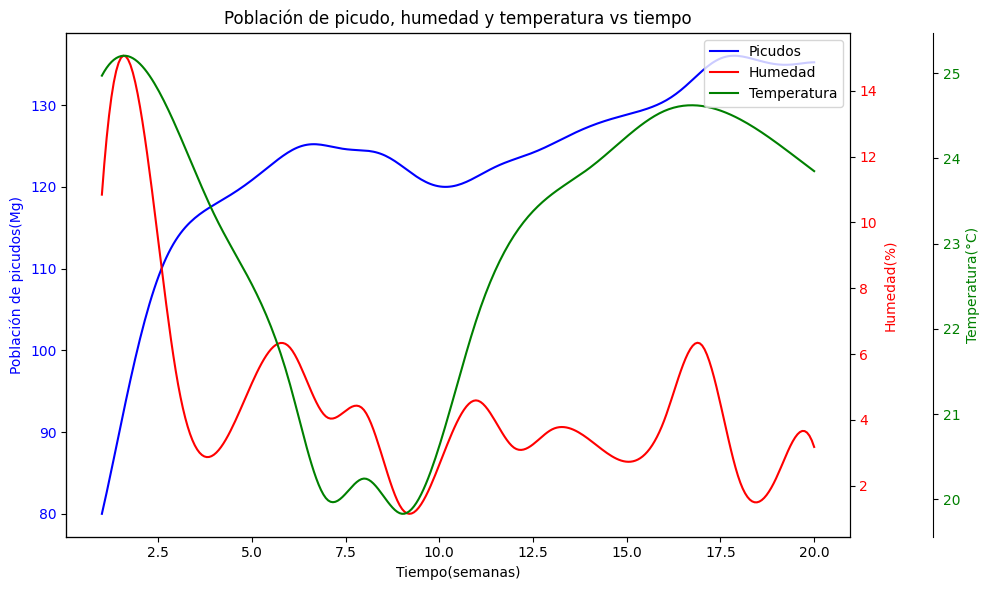

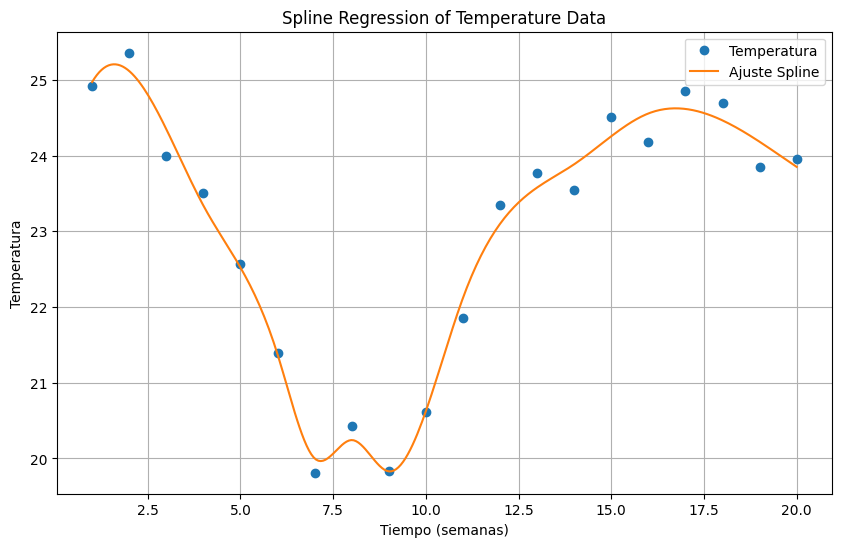

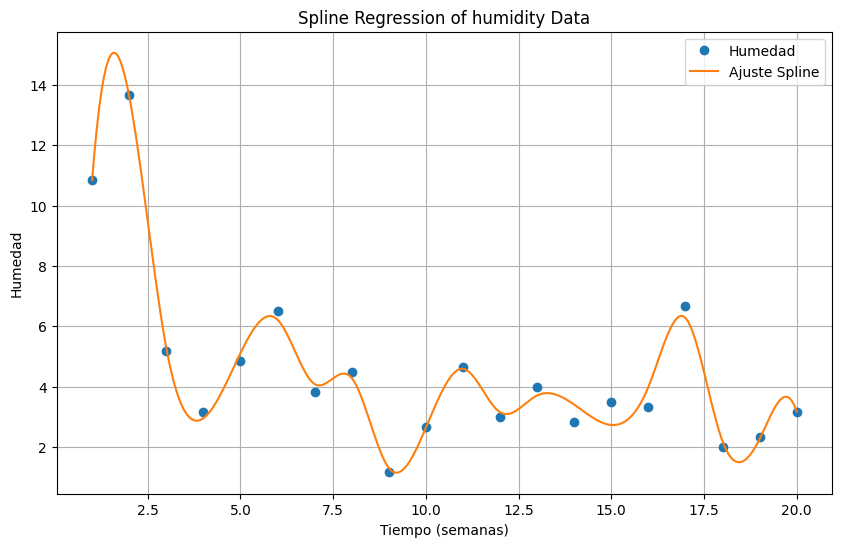

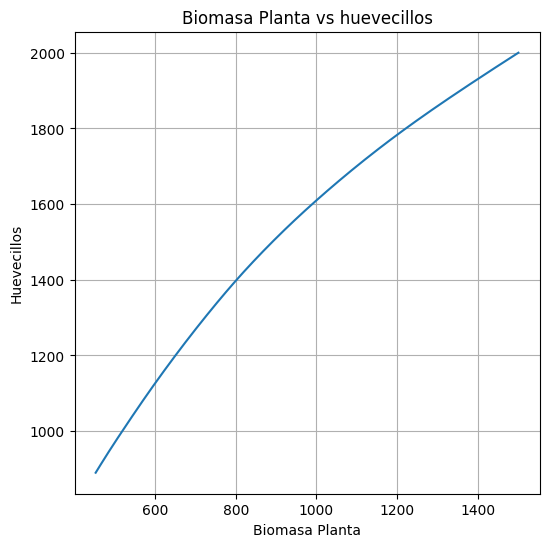

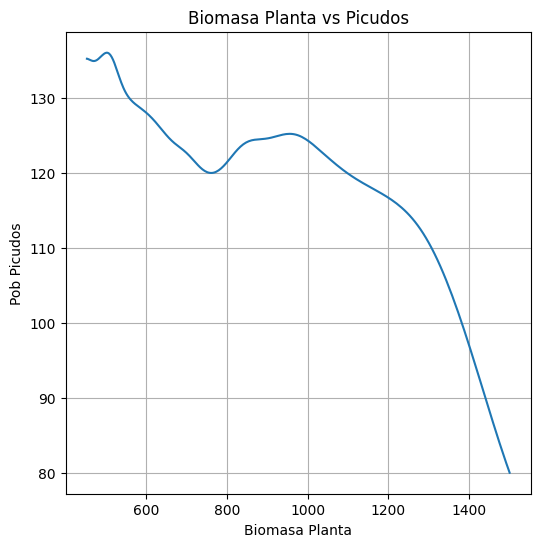

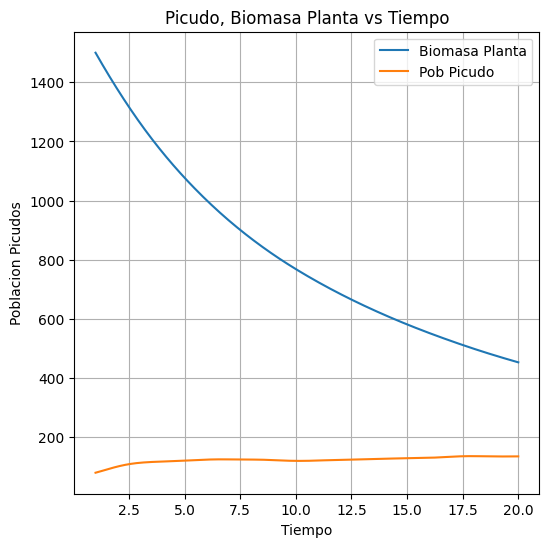

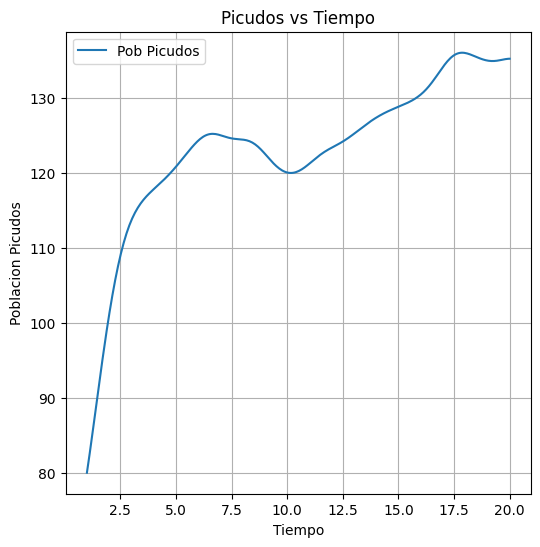

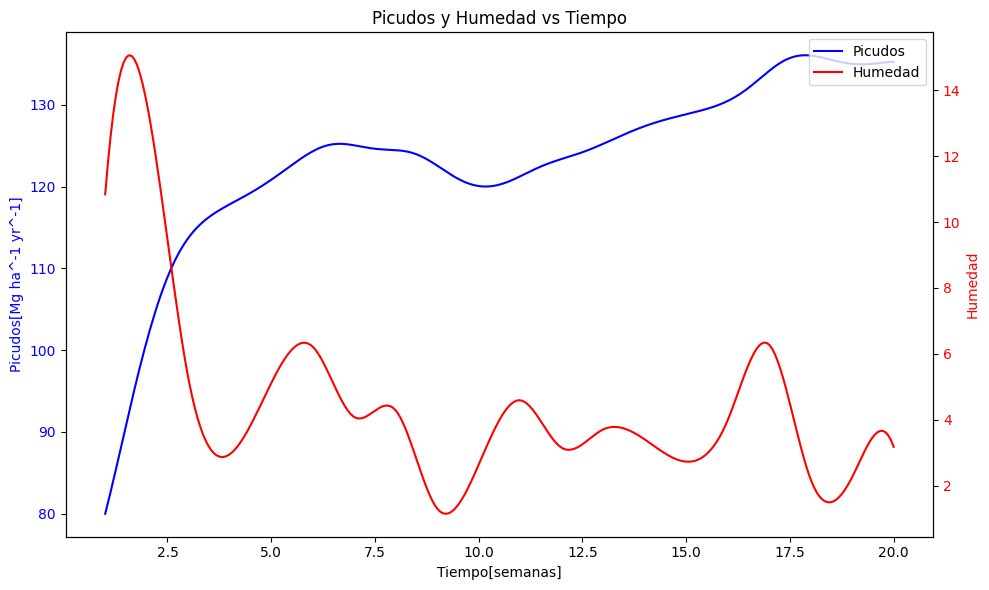

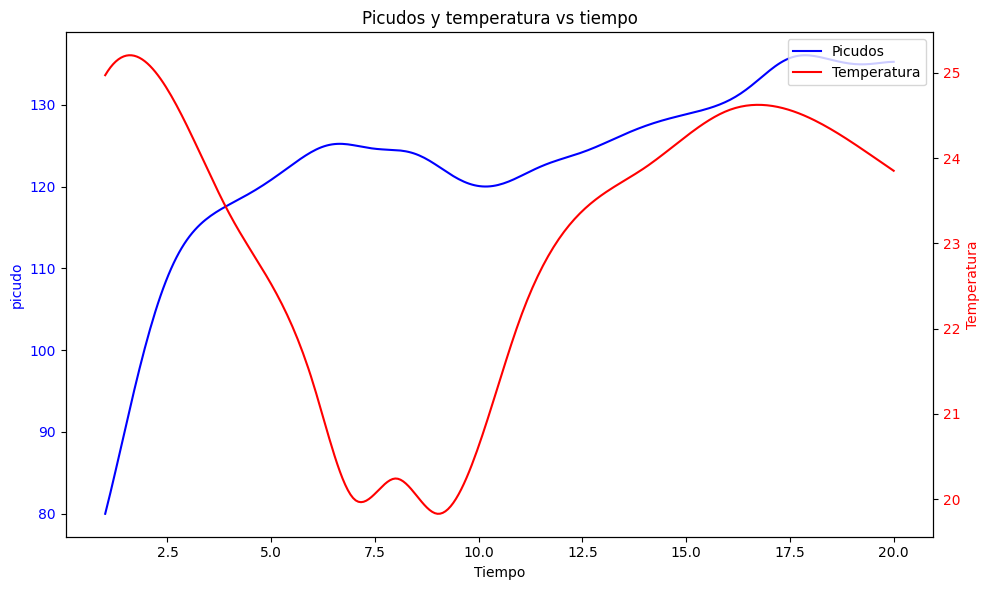

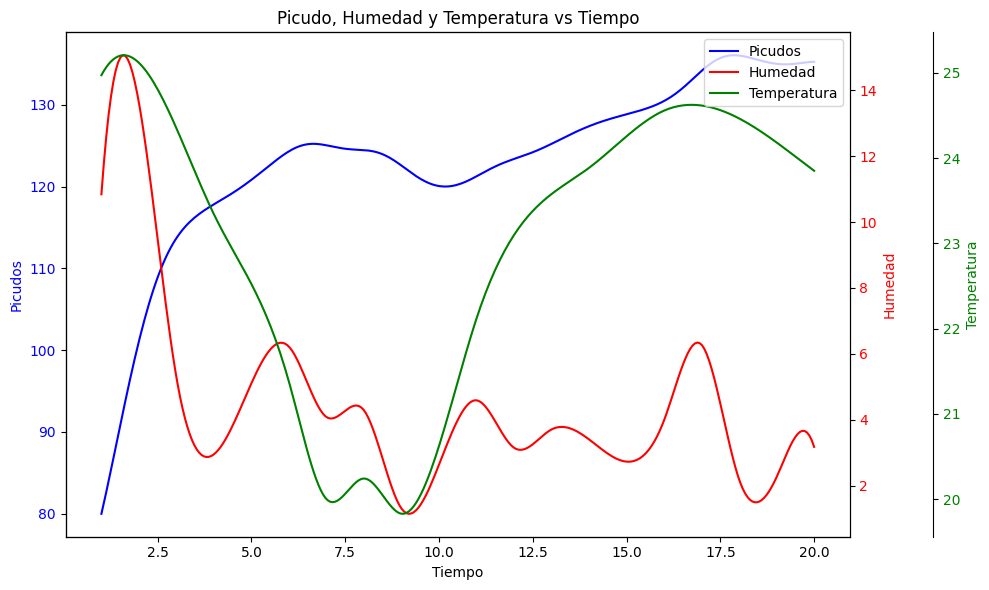

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Data temperature
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
TT = np.array([24.913, 25.359, 23.999, 23.508, 22.565, 21.398, 19.812, 20.425, 19.829, 20.614, 21.855, 23.343, 23.767, 23.552, 24.511, 24.180, 24.858, 24.690, 23.850, 23.960])


#data humidity
T = np.array([10.833, 13.667, 5.167, 3.167, 4.833, 6.500, 3.833, 4.500, 1.167, 2.667, 4.667, 3.000, 4.000, 2.833, 3.500, 3.333, 6.667, 2.000, 2.333, 3.167])


# Spline regression temperature
spl = UnivariateSpline(t, TT, s=1)

# Spline regression humidity
splT = UnivariateSpline(t, T, s=2)

# Generate points for the spline curve of temperature

t_smooth1 = np.linspace(t.min(), t.max(), 300)
TT_smooth1 = spl(t_smooth1)

# Generate points for the spline curve of humidity
t_smooth = np.linspace(t.min(), t.max(), 300)
T_smooth = splT(t_smooth)



#plot the results of temperature
plt.figure(figsize=(10,6))
plt.plot(t, TT, 'o', label = 'Temperatura')
plt.plot(t_smooth1, TT_smooth1, '-', label= 'Ajuste Spline')
plt.xlabel('Tiempo (semanas)')
plt.ylabel('Temperatura(°C)')
plt.title('Spline Regression of Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results of humidity
plt.figure(figsize=(10, 6))
plt.plot(t, T, 'o', label='Humedad')
plt.plot(t_smooth, T_smooth, '-', label='Ajuste Spline')
plt.xlabel('Tiempo (semanas)')
plt.ylabel('Humedad (%)')
plt.title('Spline Regression of humidity Data')
plt.legend()
plt.grid(True)
plt.show()



from scipy.integrate import odeint

def hum_ode(t_smooth):
  out = splT(t_smooth)
  return out
def tem_ode(t_smooth1):
  out = spl(t_smooth1)
  return out


# Define the system of differential equations
# def system(y, t, p, f, m, r, h, gamma, K, Tm, z, Hm):
#variables: P = biomasa de la planta, H = picudo, W = Huevecillos


def system(y, t, f, m, r, h, gamma, K, i, p):
    P, H, W = y
    dPdt = r*P*(1.0 - P / K) - f*P*H / (1.0 + f*h*P)
    dHdt = H * (-m + gamma*f*P / (1.0 + h*f*P)) + hum_ode(t) + tem_ode(t)
    dWdt = i*H - p*W #modelo original para los huevecillos

    #modelo 1 posible para los huevecillos
    #dWdt = Bw * ((ew*P*W)/(1+hw*ew)) - dw*W

#############################################################

    #modelo 2 posible para los huevecillos
    #dWdt = (gamma2*f2*H*W)/(1+e*f2*H)-m2*W

    return [dPdt, dHdt, dWdt]

#con parametros para huevecillos del modelo 1 posible
#ew = 0.0002
#hw = 0.00025
#Bw = 0.0007
#dw = 0.0005

#con parametros para huevecilllos del modelo 2 posible.

#gamma2 = 0.0002
#f2 = 0.0005
#m2 = 0.3
#e = 0.05

# Set parameter values
f = 0.0002 # Mg ha^-1 year^-1
m = 0.2
r = 0.0025 # year^-1
h = 0.01
gamma = 0.0008
K = 50.0 # [ha*year^2*Mg ]
Tm = 20 # se mide en grados celsius
Hm = 20 # se mide en porcentaje, g/m^3
p = 0.0005 # [year^-1]
i = 0.006 # [year^-1]

# Initial conditions
P0 = 1500 # biomasa planta
H0 = 80 # poblacion picudos
W0 = 2000 # poblacion huevecillos

# Time points
# tiempo = np.linspace(t.min(), t.max(), 300)

# Solve the system of equations
y = odeint(system, [P0, H0, W0], t_smooth, args=(f, m, r, h, gamma, K, i, p))
P, H, W = y.T

# Grafica de biomasa de la planta vs Huevecillos
plt.figure(figsize=(6, 6))
plt.plot(P, W)
plt.xlabel('Biomasa planta(Mghe^-1año^-1)')
plt.ylabel('Huevecillos(Mg)')
plt.title('Biomasa planta vs huevecillos')
plt.grid(True)
plt.show()

# Grafica de biomasa de la planta vs Picudo
plt.figure(figsize=(6, 6))
plt.plot(P, H)
plt.xlabel('Biomasa planta(Mghe^-1año^-1)')
plt.ylabel('Población de picudo(Mg)')
plt.title('Biomasa planta vs picudos')
plt.grid(True)
plt.show()

# Grafica de la biomasa de la planta, picudo y huevecillos vs el tiempo
plt.figure(figsize=(6, 6))
plt.plot(t_smooth, P, label='Biomasa planta')
plt.plot(t_smooth, H, label='Población de picudo')
legend = plt.legend()
plt.xlabel('Tiempo(semanas)')
plt.ylabel('Poblacion de picudo(Mg)')
plt.title('Picudo, biomasa planta vs tiempo')
plt.grid(True)
plt.show()

# Grafica de picudo vs el tiempo
plt.figure(figsize=(6, 6))
plt.plot(t_smooth, H, label='Población de picudo')
legend = plt.legend()
plt.xlabel('Tiempo(semanas)')
plt.ylabel('Poblacion de picudo(Mg)')
plt.title('Picudos vs tiempo')
plt.grid(True)
plt.show()

# Poblacion y humedad
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(t_smooth, H, color='b', label='Picudos')
ax1.set_xlabel('Tiempo(semanas)')
ax1.set_ylabel('Picudos(Mg ha^-1año^-1)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(t_smooth, hum_ode(t_smooth), color='r', label='Humedad(%)')
ax2.set_ylabel('Humedad(%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Picudos y humedad vs tiempo')
fig.tight_layout()
plt.legend(handles=[ax1.lines[0], ax2.lines[0]], labels=['Picudos', 'Humedad'])
plt.show()

############################################

#Poblacion y temperatura

#el error era que no teniamos como comentario los proximos 5 codigos siguientes y
# estos forman parte de dicha grafica

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(t_smooth, H, color='b', label='Picudo (Mg)')
ax1.set_xlabel('Tiempo(semanas)')
ax1.set_ylabel('Población de picudo(Mg)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(t_smooth, tem_ode(t_smooth), color='r', label='Temperatura(°C)')
ax2.set_ylabel('Temperatura(°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Población de picudo y temperatura vs tiempo')
fig.tight_layout()
plt.legend(handles=[ax1.lines[0], ax2.lines[0]], labels=['Picudos', 'Temperatura'])
plt.show()

##########################################################


# Assuming you have t_smooth, H, and hum_ode(t_smooth) defined from your previous code

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot H (picudos) on the first y-axis
ax1.plot(t_smooth, H, color='b', label='Picudos')
ax1.set_xlabel('Tiempo(semanas)')
ax1.set_ylabel('Población de picudos(Mg)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for humidity
ax2 = ax1.twinx()
ax2.plot(t_smooth, hum_ode(t_smooth), color='r', label='Humedad')
ax2.set_ylabel('Humedad(%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Assuming you have T and t defined and temperature data is available
# Plot Temperature on the second y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the right spine outward
ax3.plot(t_smooth, tem_ode(t_smooth), color='g', label = 'Temperatura') ##aqui estaba el error era
# tem_ode en lugar de hum_ode
ax3.set_ylabel('Temperatura(°C)', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# Set title and legend
plt.title('Población de picudo, humedad y temperatura vs tiempo')
fig.tight_layout()

# Combine legend entries
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')

plt.show()


#####################################################################
#ULTIMA ACTUALIZACION DEL PICUDO#
#######################################################################


import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Data temperature
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
TT = np.array([24.913, 25.359, 23.999, 23.508, 22.565, 21.398, 19.812, 20.425, 19.829, 20.614, 21.855, 23.343, 23.767, 23.552, 24.511, 24.180, 24.858, 24.690, 23.850, 23.960])


#data humidity
T = np.array([10.833, 13.667, 5.167, 3.167, 4.833, 6.500, 3.833, 4.500, 1.167, 2.667, 4.667, 3.000, 4.000, 2.833, 3.500, 3.333, 6.667, 2.000, 2.333, 3.167])


# Spline regression temperature
spl = UnivariateSpline(t, TT, s=1)

# Spline regression humidity
splT = UnivariateSpline(t, T, s=2)

# Generate points for the spline curve of temperature

t_smooth1 = np.linspace(t.min(), t.max(), 300)
TT_smooth1 = spl(t_smooth)

# Generate points for the spline curve of humidity
t_smooth = np.linspace(t.min(), t.max(), 300)
T_smooth = splT(t_smooth)



#plot the results of temperature
plt.figure(figsize=(10,6))
plt.plot(t, TT, 'o', label = 'Temperatura')
plt.plot(t_smooth1, TT_smooth1, '-', label= 'Ajuste Spline')
plt.xlabel('Tiempo (semanas)')
plt.ylabel('Temperatura')
plt.title('Spline Regression of Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results of humidity
plt.figure(figsize=(10, 6))
plt.plot(t, T, 'o', label='Humedad')
plt.plot(t_smooth, T_smooth, '-', label='Ajuste Spline')
plt.xlabel('Tiempo (semanas)')
plt.ylabel('Humedad')
plt.title('Spline Regression of humidity Data')
plt.legend()
plt.grid(True)
plt.show()



from scipy.integrate import odeint

def hum_ode(t_smooth):
  out = splT(t_smooth)
  return out
def tem_ode(t_smooth1):
  out = spl(t_smooth1)
  return out


# Define the system of differential equations
# def system(y, t, p, f, m, r, h, gamma, K, Tm, z, Hm):
#variables: P = biomasa de la planta, H = picudo, W = Huevecillos


def system(y, t, f, m, r, h, gamma, K, f2, e, gamma2, m2):
    P, H, W = y
    dPdt = r*P*(1.0 - P / K) - f*P*H / (1.0 + f*h*P)
    dHdt = H * (-m + gamma*f*P / (1.0 + h*f*P)) + hum_ode(t) + tem_ode(t)
    #dWdt = i*H - p*W #modelo original para los huevecillos

    #modelo 1 posible para los huevecillos
    #dWdt = Bw * ((ew*P*W)/(1+hw*ew)) - dw*W

#############################################################

    #modelo 2 posible para los huevecillos
    dWdt = (gamma2*f2*H*W)/(1+e*f2*H)-m2*W

    return [dPdt, dHdt, dWdt]

#con parametros para huevecillos del modelo 1 posible
#ew = 0.0002
#hw = 0.00025
#Bw = 0.0007
#dw = 0.0005

#con parametros para huevecilllos del modelo 2 posible.

gamma2 = 0.0002
f2 = 0.0005
m2 = 0.3
e = 0.05

# Set parameter values
f = 0.0002 # Mg ha^-1 year^-1
m = 0.2
r = 0.0025 # year^-1
h = 0.01
gamma = 0.0008
K = 50.0 # [ha*year^2*Mg ]
Tm = 20 # se mide en grados celsius
Hm = 20 # se mide en porcentaje, g/m^3
#p = 0.0005 # [year^-1]
#i = 0.006 # [year^-1]

# Initial conditions
P0 = 1500 # biomasa planta
H0 = 80 # poblacion picudos
W0 = 2000 # poblacion huevecillos

# Time points
# tiempo = np.linspace(t.min(), t.max(), 300)

# Solve the system of equations
y = odeint(system, [P0, H0, W0], t_smooth, args=(f, m, r, h, gamma, K, gamma2, f2, m2, e))
P, H, W = y.T

# Grafica de biomasa de la planta vs Huevecillos
plt.figure(figsize=(6, 6))
plt.plot(P, W)
plt.xlabel('Biomasa Planta')
plt.ylabel('Huevecillos')
plt.title('Biomasa Planta vs huevecillos')
plt.grid(True)
plt.show()

# Grafica de biomasa de la planta vs Picudo
plt.figure(figsize=(6, 6))
plt.plot(P, H)
plt.xlabel('Biomasa Planta')
plt.ylabel('Pob Picudos')
plt.title('Biomasa Planta vs Picudos')
plt.grid(True)
plt.show()

# Grafica de la biomasa de la planta, picudo y huevecillos vs el tiempo
plt.figure(figsize=(6, 6))
plt.plot(t_smooth, P, label='Biomasa Planta')
plt.plot(t_smooth, H, label='Pob Picudo')
legend = plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Poblacion Picudos')
plt.title('Picudo, Biomasa Planta vs Tiempo')
plt.grid(True)
plt.show()

# Grafica de picudo vs el tiempo
plt.figure(figsize=(6, 6))
plt.plot(t_smooth, H, label='Pob Picudos')
legend = plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Poblacion Picudos')
plt.title('Picudos vs Tiempo')
plt.grid(True)
plt.show()

# Poblacion y humedad
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(t_smooth, H, color='b', label='Picudos')
ax1.set_xlabel('Tiempo[semanas]')
ax1.set_ylabel('Picudos[Mg ha^-1 yr^-1]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(t_smooth, hum_ode(t_smooth), color='r', label='Humedad')
ax2.set_ylabel('Humedad', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Picudos y Humedad vs Tiempo')
fig.tight_layout()
plt.legend(handles=[ax1.lines[0], ax2.lines[0]], labels=['Picudos', 'Humedad'])
plt.show()

############################################

#Poblacion y temperatura

#el error era que no teniamos como comentario los proximos 5 codigos siguientes y
# estos forman parte de dicha grafica

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(t_smooth, H, color='b', label='Picudo')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('picudo', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(t_smooth, tem_ode(t_smooth), color='r', label='Temperatura')
ax2.set_ylabel('Temperatura', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Picudos y temperatura vs tiempo')
fig.tight_layout()
plt.legend(handles=[ax1.lines[0], ax2.lines[0]], labels=['Picudos', 'Temperatura'])
plt.show()

##########################################################


# Assuming you have t_smooth, H, and hum_ode(t_smooth) defined from your previous code

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot H (picudos) on the first y-axis
ax1.plot(t_smooth, H, color='b', label='Picudos')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Picudos', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for humidity
ax2 = ax1.twinx()
ax2.plot(t_smooth, hum_ode(t_smooth), color='r', label='Humedad')
ax2.set_ylabel('Humedad', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Assuming you have T and t defined and temperature data is available
# Plot Temperature on the second y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the right spine outward
ax3.plot(t_smooth, tem_ode(t_smooth), color='g', label = 'Temperatura') ##aqui estaba el error era
# tem_ode en lugar de hum_ode
ax3.set_ylabel('Temperatura', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# Set title and legend
plt.title('Picudo, Humedad y Temperatura vs Tiempo')
fig.tight_layout()

# Combine legend entries
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')

plt.show()